# Loveida Lucero

# **(Practice) Visualizing Time Series**
For this assignment, you will be working with a modified version of [weather data from London from Kaggle](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data).

- Use the modified version of the data provided here:
  - Share URL: https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing
  - Raw URL:
    - https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv

First, load in the data. To save some time, you can leverage Panda's read_csv function to convert the date column

**1.Convert the date column to datetime dtype.** Double-check the result. Is it what you expected? If not, be sure to correct it by entering the appropriate format!

**2.Set the date column as the index. Inspect the new index of your dataframe.** What type of index is it? Does it have a frequency?

**3.Filter out only the required data:**
  - Keep only data from the year 2000 or later.
  - Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

**4.Impute any missing values.**
  - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

**5.Plot the mean, min, and max temps for 2018-2020 on one figure.**

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
  - Create a wide figure (e.g. figsize=(12,3))
  - Set the title to "Daily Temperature"
  - Set the ylabel to "Degrees"
  - Customize the major xaxis ticks to:
    - Have major xaxis ticks every 1 year.
    - Use 4-digit years for the labels
    - Rotate the major ticks' labels 90 degrees.
  - Customize the minor xaxis ticks to:
    - Have minor xaxis ticks every 3 months
    - Use 3-letter month names for the labels.


- Your final figure should look something like the image below. You are highly encouraged, though, to apply additional customization/tweaks to your final figure!
  - ![png](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1666119902__practice_ts_viz_1.png)

**6.Plot the precipitation and snow depth for 2000-2020**

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
  - Create a wide figure (e.g. figsize=(12,3))
  - With the title of "Daily Precipitation"
  - With a ylabel of "Inches"
  - Customize the major xaxis ticks to:
    - Have major xaxis ticks every 5 years.
    -  4-digit years for the labels
    - Rotate the major ticks' labels 45 degrees.
  - Customize the minor xaxis ticks to:
    - Have minor xaxis ticks every 3 months
    - Do not label the minor ticks on the x-axis.
- Your final figure should look something like the image below. You are highly encouraged, though, to apply additional customization/tweaks to your final figure!
  - ![png](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1666119956__practice_ts_viz_2.png)


# Solution

**Imports**

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

**Load Data**

In [2]:
df = pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## 1.Convert the date column to datetime dtype. 
Double-check the result. Is it what you expected? If not, be sure to correct it by entering the appropriate format!

In [3]:
# attempt to convert date to datetime
pd.to_datetime(df['date'])

0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

In [4]:
# correct convertion
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

## 2.Set the date column as the index. 
Inspect the new index of your dataframe. What type of index is it? Does it have a frequency?

In [5]:
# set index
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [6]:
# inspect index
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

- index is a datetime
- index has no frequency

## 3.Filter out only the required data:
  - Keep only data from the year 2000 or later.
  - Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

In [7]:
df_filtered = df.loc['2000':, ['precipitation',
                      'mean_temp', 
                      'min_temp', 
                      'max_temp', 
                      'snow_depth']]
df_filtered

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## 4.Impute any missing values.
Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [8]:
# check for null counts
df_filtered.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
# imputing with interpolate for temp columns
df_filtered['mean_temp'] = df_filtered['min_temp'].interpolate()
df_filtered['min_temp'] = df_filtered['min_temp'].interpolate()
df_filtered['max_temp'] = df_filtered['max_temp'].interpolate()

# imputing with forward fill for precipitation and snow_depth
df_filtered['precipitation'] = df_filtered['precipitation'].interpolate()
df_filtered['snow_depth'] = df_filtered['snow_depth'].interpolate()

In [10]:
# comfirm nulls were addressed
df_filtered.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## 5.Plot the mean, min, and max temps for 2018-2020 on one figure.

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
  - Create a wide figure (e.g. figsize=(12,3))
  - Set the title to "Daily Temperature"
  - Set the ylabel to "Degrees"
  - Customize the major xaxis ticks to:
    - Have major xaxis ticks every 1 year.
    - Use 4-digit years for the labels
    - Rotate the major ticks' labels 90 degrees.
  - Customize the minor xaxis ticks to:
    - Have minor xaxis ticks every 3 months
    - Use 3-letter month names for the labels.

In [11]:
# define columns and years to plot
plot_df = df_filtered.loc['2018':,['mean_temp','min_temp','max_temp']]

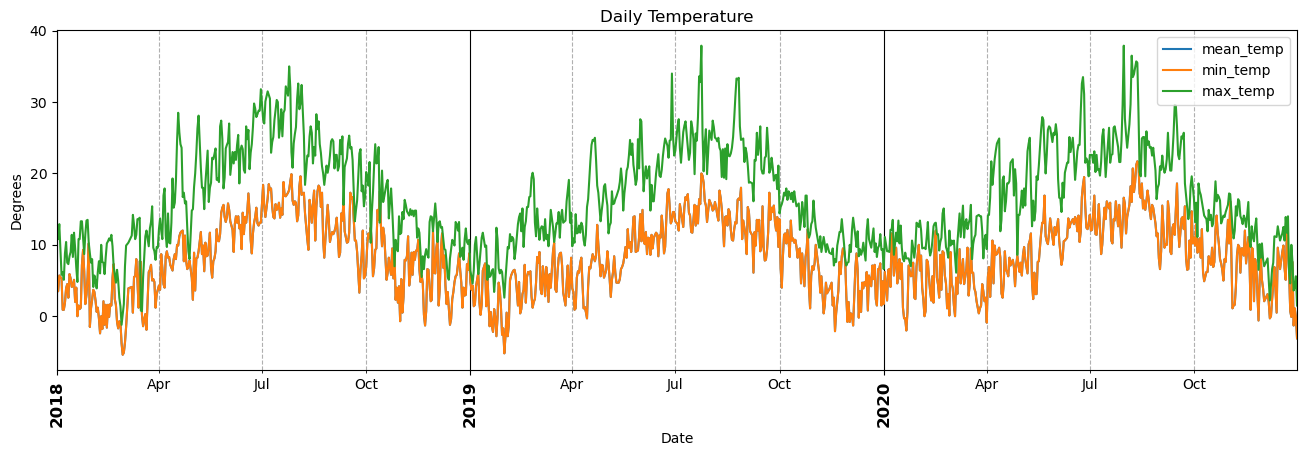

In [12]:
## Plot the data
ax = plot_df.plot(figsize=(16,5))
ax.set(title='Daily Temperature', ylabel='Degrees', xlabel='Date')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
ax.grid(which='minor',axis='x',ls="--")
ax.grid(which='major',axis='x',color='k')
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90, ha='center');

In [13]:
# define columns and years to plot
plot_df = df_filtered.loc['2018':,['mean_temp']]

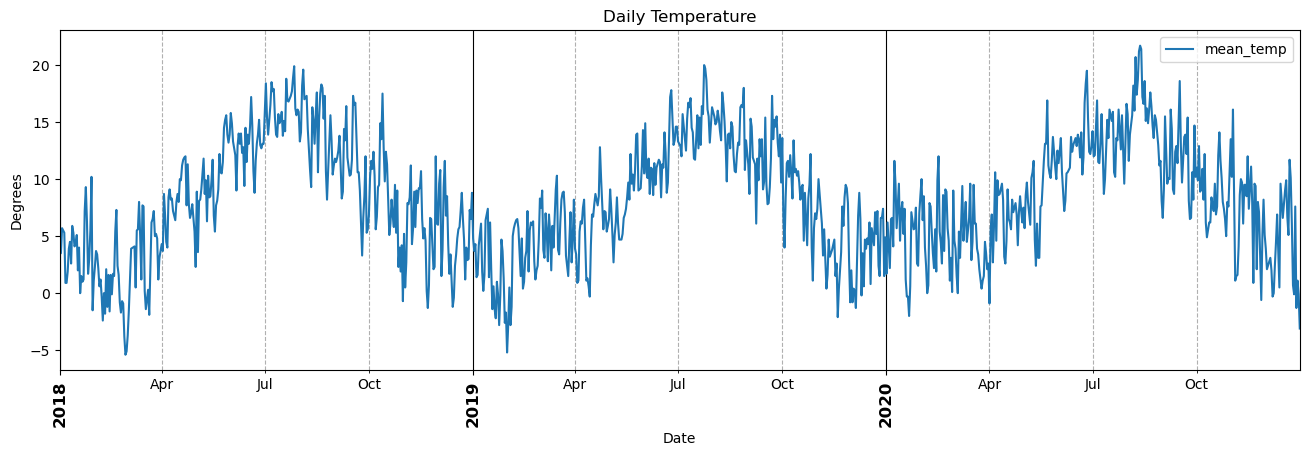

In [14]:
## Plot the data
ax = plot_df.plot(figsize=(16,5))
ax.set(title='Daily Temperature', ylabel='Degrees', xlabel='Date')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
ax.grid(which='minor',axis='x',ls="--")
ax.grid(which='major',axis='x',color='k')
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90, ha='center');

## 6.Plot the precipitation and snow depth for 2000-2020

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
  - Create a wide figure (e.g. figsize=(12,3))
  - With the title of "Daily Precipitation"
  - With a ylabel of "Inches"
  - Customize the major xaxis ticks to:
    - Have major xaxis ticks every 5 years.
    -  4-digit years for the labels
    - Rotate the major ticks' labels 45 degrees.
  - Customize the minor xaxis ticks to:
    - Have minor xaxis ticks every 3 months
    - Do not label the minor ticks on the x-axis.

In [15]:
# define colums and years to plot
plot_df  = df_filtered.loc["2000":,['precipitation','snow_depth']]
plot_df

,precipitation,snow_depth
date,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2020-12-27,2.0,0.0
2020-12-28,0.2,0.0
2020-12-29,0.0,0.0


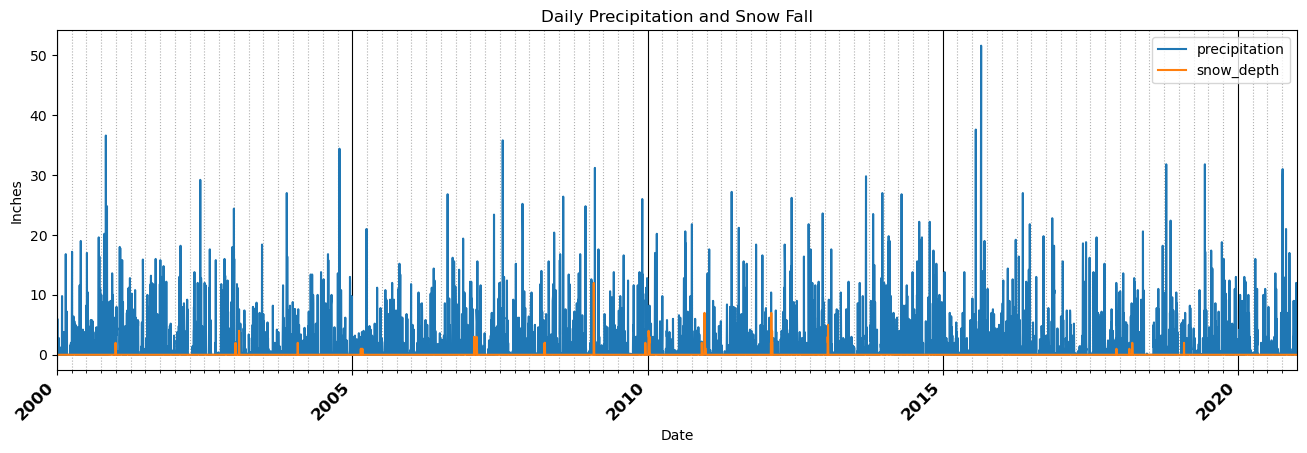

In [17]:
ax = plot_df.plot(figsize=(16,5))
ax.set( title='Daily Precipitation and Snow Fall',
      ylabel='Inches',
      xlabel='Date')

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(minor_loc)


## Final xdate tweaks
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=45)